[View in Colaboratory](https://colab.research.google.com/github/khandelwal1998/BigMartSales_Eda_Prediction/blob/master/Sale_Mart.ipynb)

<font color="#001a33" size=15px>Big mart sales analysis</font>

<font face="Verdana" size=3px>This project aims in analyzing the sales ofeach product in a particular shop.
Machine learning play a vital role in these kind of predictions ad help a lot in increasing the business.
<br>
I am working on the big mart sales dataset which was collected by data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.<br>

To get a good result we will follow a step by step process which will include:</font>

1. Getting the data
3. Data preprocessing
2. EDA on the data to get a good idea of each trends.
4. Feature Engineering
5. Training the model.
6. Evaluation of the model.

## importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,10)
import statistics

Lets import the dataset.

The data set is available at [here](https://drive.google.com/file/d/1sukL3ljrJIhgW3NbsnKoayGd7Pfy-gqo/view)

In [0]:
# from google.colab import files
# files.upload()

In [0]:
data=pd.read_csv("Big_mart.csv")

In [185]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Check out the basic details of the data.

In [186]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<font color="#001a33" size=6px>Atribute Information</font>

1. Item_Identifire: Unique id for each product.
2. Item_weigth: Wight of the product.
3. Item_fat_content: Whether the product has low fat content or normal.
4. Item_Visibility:The  of total display area of all products in a store alloated to the particular       product.
5. Item_Type: The category of each item.
6. Item_MRP: Price of each item.
7. Outlet_Identifier: Unique store id
8. Outlet_establishment_year: Year the outlet was estd.
9. Outlet_Size: Size of the outlet in terms of ground area.
10. Outlet_Location_Type: The type of city where the outlet is located.
11. Outlet_Type: Outlet is grocery store or supermarket
12. Item_Outlet_Sales: Output variable


In [187]:
data.shape

(8523, 12)

In [188]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## Data Preprocessing

In [189]:
len(data['Item_Identifier'].unique())

1559

There are total of 1559 products available and total 10 outlets in all.


In the above description there are two things that are important to be noticed:

First is regarding the fat. According to the data there are only Two categories: Low fat and regular, but there are 5 unique values so lets check them out.

In [190]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

So the problem arised due to naming of variables so lets combine the similar ones.

In [0]:
data.loc[(data['Item_Fat_Content']=="LF") | (data['Item_Fat_Content']=='low fat') , 'Item_Fat_Content' ]="Low Fat"
data.loc[(data['Item_Fat_Content']=="reg")  , 'Item_Fat_Content' ]="Regular"

In [192]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

The other Problem is with the item visibility. Some of the item visibility is 0 but it cant be. so fill it with the mean of that column.

In [0]:
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data['Item_Visibility'].mean()

## Removal of NULL values

In [194]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item weight null values need to be filled by the mean weight of the items of that particular value.

In [0]:
val=data.groupby(['Item_Identifier'])['Item_Weight'].mean()

In [0]:
data.loc[data['Item_Weight'].isnull(),'Item_Weight']=data.loc[data['Item_Weight'].isnull(),'Item_Identifier'].apply(lambda x:val[x])


In [197]:
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [0]:
data.drop([927,1922,4187,5022],inplace=True)

In [199]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

To fill the outlet size null values we can take help of item identifier. We will compute mode outlet size of particular item identifier and store it into the null place

In [0]:
val2 = data.pivot_table(values='Outlet_Size', index='Item_Identifier',aggfunc=statistics.mode)

In [201]:
len(val2)

0

# EDA

## Univariate analysis

Item weigth

(array([ 590., 1043., 1034.,  790.,  941.,  758.,  918.,  899.,  826.,
         720.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

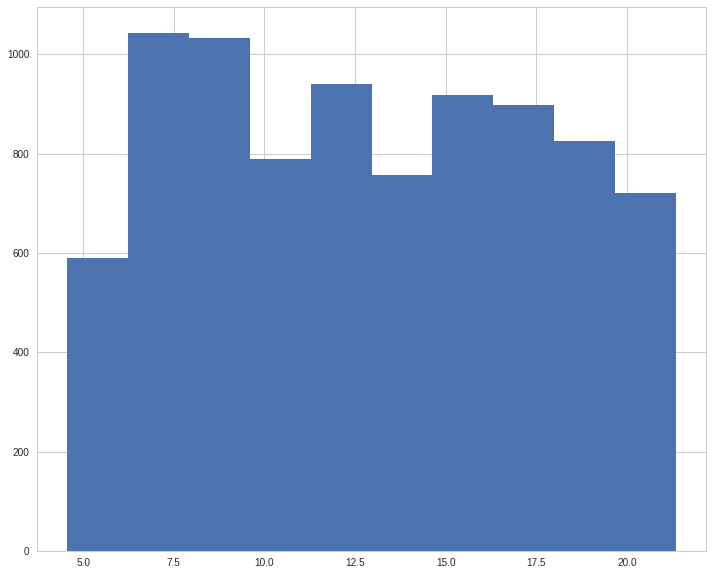

In [202]:
# sns.set(style="whitegrid", color_codes=True)
# sns.distplot(data['Item_Weight'],bins=40)
plt.hist(data['Item_Weight'])